In [1]:
from project_code.label_loader import *
from project_code.image_loader import *
from project_code.util import *
from project_code.models import *
from project_code.model_trainer import *
from project_code.dataset import *

In [2]:
file_name_1 = '/Users/fahimtajwar/Academics/cs231/labels_cells_only.xlsx'
file_name_2 = '/Users/fahimtajwar/Academics/cs231/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'grows dense', 'grows sparse', 'cell dies'}
{'grows dense': 0, 'grows sparse': 1, 'cell dies': 2}
tensor([0.0294, 0.0097, 0.0260])


In [3]:
prefix = "/Users/fahimtajwar/Academics/cs231/project_data_well_2/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[ 374 1171 1829 1770  702 1825 1037 1714 2094 1791  456 1733 1849 2939
  623  653 2285 1828 2368 1679  451  608 1775 1111 1785 1857  272 1958
  167 1667  412 1967 1004 2578 2406 1807 2693 1006 1974  321 2344 1812
 1979 1940 1739 1672 1646 1962 1772 2839 1591 2346 2751 2986  329 2228
 1324 2124 1476   29 2543 2134  499 2625  522 1644 1130 1046   54 1015
   62  100 1913 1998 2017 1779  572 2853 2164  331 1880 2810 1689  755
   52 2018 1622  384 1600  525 2857 2971 2107  548 2955 2122   42 1019
 2215  667 2579 1016 1848 2337  424  419  387 1134 2194  391 1023 2800
 1153 2640 1146  326 1060 1900  587 1520 1977 1064 1866 1918 2082 2870
 2001 2011 2942 1859 1693 1870  159 2387  683 1036  723 2397 1754 1389
 2135 2231 2199 2023  121  767  381 2351 1819 2501 2684  221 2393 1794
   75 2239 1891 2666 1516 1607 1835   98  564 1457  197 1175 1876 1833
 2920 1460 1611 1524 1736 1893  101 2991 2847 2881  418  187 2484 1569
  275 1176  518 2899  536 1327   17 1815 1608 2820 1337 2249  635  559
 1

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
logistic_model = LogisticRegression(input_size, num_classes)

In [8]:
model = Model(logistic_model, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1524
Epoch: [2/30], Loss: 1.1054
Epoch: [3/30], Loss: 1.1324
Epoch: [4/30], Loss: 1.1012
Epoch: [5/30], Loss: 1.0818
Epoch: [6/30], Loss: 1.0721
Epoch: [7/30], Loss: 1.0470
Epoch: [8/30], Loss: 1.0625
Epoch: [9/30], Loss: 1.0715
Epoch: [10/30], Loss: 1.0612
Epoch: [11/30], Loss: 1.0544
Epoch: [12/30], Loss: 1.0431
Epoch: [13/30], Loss: 1.0358
Epoch: [14/30], Loss: 1.0559
Epoch: [15/30], Loss: 1.0340
Epoch: [16/30], Loss: 1.0427
Epoch: [17/30], Loss: 1.0298
Epoch: [18/30], Loss: 1.0183
Epoch: [19/30], Loss: 1.0174
Epoch: [20/30], Loss: 1.0018
Epoch: [21/30], Loss: 1.0050
Epoch: [22/30], Loss: 1.0324
Epoch: [23/30], Loss: 0.9859
Epoch: [24/30], Loss: 0.9920
Epoch: [25/30], Loss: 1.0028
Epoch: [26/30], Loss: 0.9970
Epoch: [27/30], Loss: 0.9790
Epoch: [28/30], Loss: 0.9925
Epoch: [29/30], Loss: 0.9810
Epoch: [30/30], Loss: 0.9702
Training done!


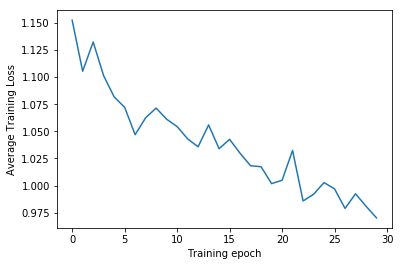

accuracy : 50.000000

Frequency per class:  {'grows sparse': 167, 'cell dies': 62, 'grows dense': 51}


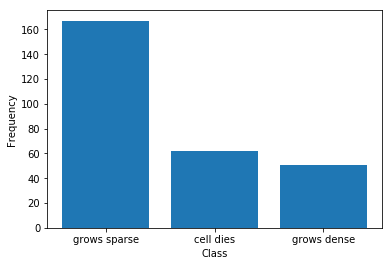

Number of datapoints we got correct per class {'grows sparse': 82, 'cell dies': 38, 'grows dense': 20}
Accuracy per class {'grows sparse': 0.49101796407185627, 'cell dies': 0.6129032258064516, 'grows dense': 0.39215686274509803}


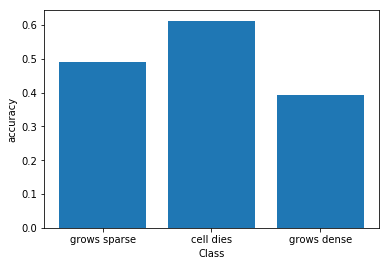

In [9]:
model.train()

accuracy : 22.000000

Frequency per class:  {'grows dense': 12, 'grows sparse': 18, 'cell dies': 5}


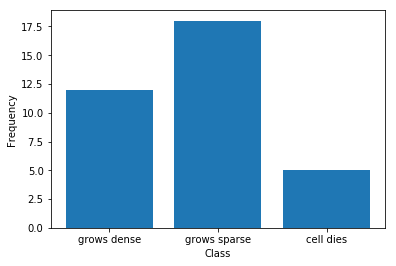

Number of datapoints we got correct per class {'grows dense': 2, 'grows sparse': 5, 'cell dies': 1}
Accuracy per class {'grows dense': 0.16666666666666666, 'grows sparse': 0.2777777777777778, 'cell dies': 0.2}


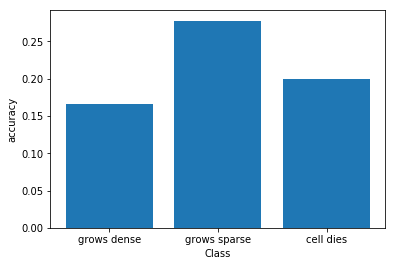

In [10]:
model.test(validation_loader)

accuracy : 45.000000

Frequency per class:  {'grows sparse': 21, 'grows dense': 5, 'cell dies': 9}


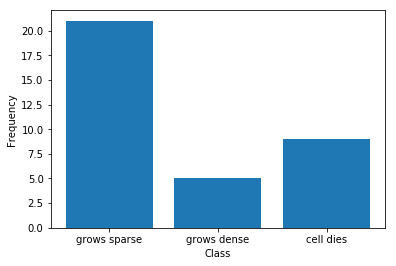

Number of datapoints we got correct per class {'grows sparse': 10, 'grows dense': 2, 'cell dies': 4}
Accuracy per class {'grows sparse': 0.47619047619047616, 'grows dense': 0.4, 'cell dies': 0.4444444444444444}


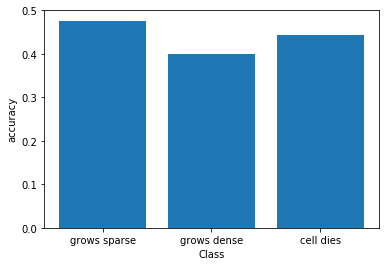

In [11]:
model.test(test_loader)